LEGO Dataset solving problems

In [53]:
#import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
#importing csv file 
lego = pd.read_csv('./datasets/lego_sets.csv')
themes_lego = pd.read_csv('./datasets/parent_themes.csv')
df = lego.merge(themes_lego, left_on='parent_theme', right_on='name')
df.drop(columns='name_y', inplace=True)
df.rename(columns={'name_x' : 'name'}, inplace=True)
df.head(8)

,set_num,name,year,num_parts,theme_name,parent_theme,id,is_licensed
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland,411,False
1,00-2,Weetabix Promotional House 1,1976,NaN,Building,Legoland,411,False
2,00-3,Weetabix Promotional House 2,1976,NaN,Building,Legoland,411,False
3,00-4,Weetabix Promotional Windmill,1976,126.0,Building,Legoland,411,False
4,00-7,Weetabix Promotional Lego Village,1976,NaN,Building,Legoland,411,False
5,102A-1,Front-End Loader,1970,64.0,Construction,Legoland,411,False
6,102A-2,Front-End Loader,1970,NaN,Construction,Legoland,411,False
7,1-10,Mini-Wheel Model Maker No. 1,1971,88.0,Vehicle,Legoland,411,False


Task #1: What percentage of all licensed sets ever released were Star Wars Themed?

In [106]:
lisenced = df[df.is_licensed]
star_wars_lisenced = lisenced[lisenced.parent_theme == 'Star Wars']
the_force = 100 * len(star_wars_lisenced) / len(lisenced)
the_force


45.72072072072072

Task #2: What percentage of each of licensed sets released?

<BarContainer object of 22 artists>

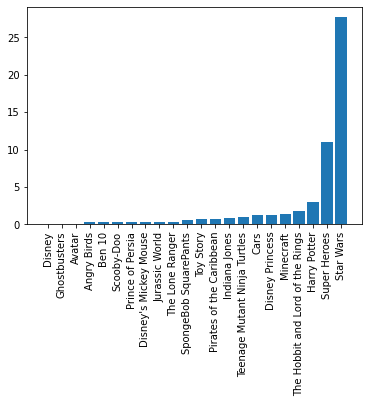

In [107]:
lisenced = df[df.is_licensed]
row = lisenced.groupby(['parent_theme']).count().loc[:, ['name']]
row.rename(columns={'name' : 'count'}, inplace=True)
row['percentage'] = row['count'] / len(row)
row.sort_values(by='percentage' , ascending=True, inplace=True)

plt.xticks(rotation='vertical')
plt.bar(row.index, row.percentage)